In [1]:
import numpy as np
%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import pickle

In [281]:
print (np.finfo(np.double).precision)
print (np.finfo(np.longdouble).precision)

15
18


In [282]:
np.longdouble(0.01)

0.010000000000000000208

# 8-2. Learning Rate Decay

Larger & Deeper

* Change node number
* Change layer number

But there's a problem.

Vanishing gradient.

In [294]:
def f(variables):
    return (((variables['x'] + np.longdouble(1.0)) ** 4) * np.longdouble(0.2) + (variables['y'] - np.longdouble(0.4)) ** 4)

x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y)
Z = f({'x': X, 'y': Y})

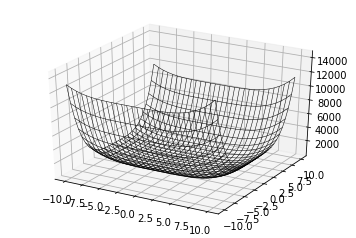

In [295]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black', linewidth=0.5)

In [446]:
def gradient(variables, variable_name):
    h = np.longdouble(1e-5)
    input2 = variables.copy()
    input2[variable_name] += h
    
    input1 = variables.copy()
    input1[variable_name] -= h
    
    z2 = f(input2)
    z1 = f(input1)
    
    delta_z = z2 - z1
    delta_x = h * 2
    return delta_z / delta_x

In [447]:
gradient({'x': 4.5, 'y': -3.0}, 'x')

133.09999999592119234

## SGD

In [448]:
current_x = np.longdouble(4.5)
current_y = np.longdouble(4.5)

f_values = []
x_values = []
y_values = []

for iteration in range(10000):
    ETA = np.longdouble(0.025)

    current = {
        'x': current_x,
        'y': current_y
    }
    f_values.append(f(current))
    x_values.append(current_x)
    y_values.append(current_y)

    
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    function_output = f(current)
    current_x = current_x - ETA * grad['x']
    current_y = current_y - ETA * grad['y']
    
    
    
print("minimum x:{}, y:{}".format(current_x, current_y))
print("f:{}".format(f(current)))

minimum x:-0.9500250341629942, y:0.3776574111025783
f:1.4969894707996717e-06


In [449]:
current_x = np.longdouble(4.5)
current_y = np.longdouble(4.5)

f_values2 = []
x_values2 = []
y_values2 = []

for iteration in range(10000):
    ETA = np.longdouble(0.001)

    current = {
        'x': current_x,
        'y': current_y
    }
    f_values2.append(f(current))
    x_values2.append(current_x)
    y_values2.append(current_y)

    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    function_output = f(current)
    current_x = current_x - ETA * grad['x']
    current_y = current_y - ETA * grad['y']
    
    
    
print("minimum x:{}, y:{}".format(current_x, current_y))
print("f:{}".format(f(current)))

minimum x:-0.7503158394552871, y:0.5117314368387035
f:0.0009333438309677475


In [450]:
current_x = np.longdouble(4.5)
current_y = np.longdouble(4.5)

f_values3 = []
x_values3 = []
y_values3 = []

for iteration in range(10000):
    ETA = np.longdouble(0.0001)

    current = {
        'x': current_x,
        'y': current_y
    }
    f_values3.append(f(current))
    x_values3.append(current_x)
    y_values3.append(current_y)
    
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    function_output = f(current)
    current_x = current_x - ETA * grad['x']
    current_y = current_y - ETA * grad['y']
    
    
    
print("minimum x:{}, y:{}".format(current_x, current_y))
print("f:{}".format(f(current)))

minimum x:-0.21758537685166118, y:0.7521817324242553
f:0.09035273852447248


In [451]:
current_x = np.longdouble(4.5)
current_y = np.longdouble(4.5)

f_values4 = []
x_values4 = []
y_values4 = []

for iteration in range(10000):
    if iteration < 250:
        ETA = np.longdouble(0.01)
    elif iteration < 1000:
        ETA = np.longdouble(1.0)
    elif iteration < 2000:
        ETA = np.longdouble(300.0)
    elif iteration < 8000:
        ETA = np.longdouble(400.0)
    else:
        ETA = np.longdouble(400)

    current = {
        'x': current_x,
        'y': current_y
    }
    f_values4.append(f(current))
    x_values4.append(current_x)
    y_values4.append(current_y)

    
    grad = {
        'x': gradient(current, 'x'),
        'y': gradient(current, 'y'),
    }
    function_output = f(current)
    current_x = current_x - ETA * grad['x']
    current_y = current_y - ETA * grad['y']
    
    
    
print("minimum x:{}, y:{}".format(current_x, current_y))
print("f:{}".format(f(current)))

minimum x:-0.9995776563349366, y:0.4001887719727865
f:7.635056670211998e-15


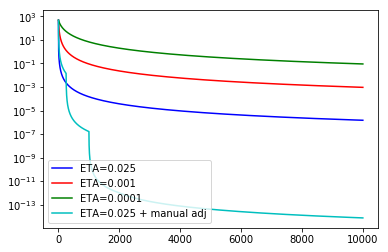

In [458]:
plt.plot(f_values, 'b', label='ETA=0.025')
plt.plot(f_values2, 'r', label='ETA=0.001')
plt.plot(f_values3, 'g', label='ETA=0.0001')
plt.plot(f_values4, 'c', label='ETA=0.025 + manual adj')
plt.yscale('log')
plt.legend()
plt.show()

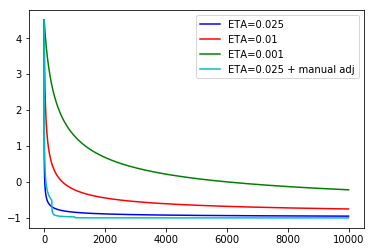

In [459]:
plt.plot(x_values, 'b', label='ETA=0.025')
plt.plot(x_values2, 'r', label='ETA=0.01')
plt.plot(x_values3, 'g', label='ETA=0.001')
plt.plot(x_values4, 'c', label='ETA=0.025 + manual adj')
# plt.yscale('log')
plt.legend()
plt.show()

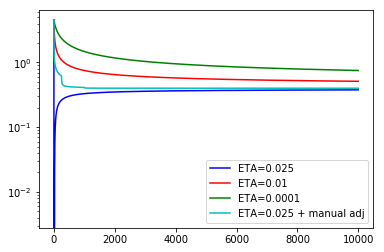

In [460]:
plt.plot(y_values, 'b', label='ETA=0.025')
plt.plot(y_values2, 'r', label='ETA=0.01')
plt.plot(y_values3, 'g', label='ETA=0.0001')
plt.plot(y_values4, 'c', label='ETA=0.025 + manual adj')
plt.yscale('log')
plt.legend()
plt.show()